In [95]:
#CREAR UN INDEX PARA ALMACENAR LOS DATOS
from elasticsearch import Elasticsearch
from pprint import pprint

es = Elasticsearch()

if not(es.indices.exists(index="tp5-championstweet")):
    res = es.indices.create(index="tp5-championstweet")  
    pprint(res)

In [96]:
#LISTAR LOS ARCHIVOS DEL DATASET
import json
import os
files = os.listdir("split_dataset_1")
pprint(len(files))

354585


In [4]:
from elasticsearch import helpers

#CARGAR LOS DATOS EN ELASTICSEARCH
tweets=[]

for filename in files:
    with open('split_dataset_1/'+filename) as f:
        try:
            #pprint(filename+':')
            tweet = json.load(f)
            timestamp=int(tweet["timestamp_ms"])
            #pprint(tweet)
            simple_tweet = {
                "timestamp":timestamp, \
                "date":tweet["created_at"], \
                "text": tweet['text'], \
                "username": tweet['user']['name'], \
                "location": tweet['user']['location']}
            tweets.append(simple_tweet)            
            
        except KeyError:
            error="error"
            
    
    
    #CARGAMOS LOS DATOS EN ELASTICSEARCH CON CONSULTAS 'BULK' PARA OPTIMIZAR EL PROCESO
    if (len(tweets)>=1000):
        i=0
        docs_as_string="["
        while i<1000:
            if i!=0:
                docs_as_string = docs_as_string + ','
            docs_as_string = docs_as_string + '\n' + json.dumps(tweets[i])
            i=i+1
        docs_as_string=docs_as_string+"]"
        res = helpers.bulk(es, json.loads(docs_as_string),index="tp5-championstweet", doc_type="_doc")
        tweets=[]

NameError: name 'simple_tweet' is not defined

In [6]:
#CONSULTA BÁSICA A ELASTICSEARCH PARA PROBAR
res = es.search(index="tp5-championstweet", body={"query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print("TWEET:%(text)s %(username)s: %(date)s" % hit["_source"])

Got 633000 Hits:
TWEET:Ah jadi ga semangat liat nya juga 😭 #UCLFinal Rifaldi.: Sat May 26 19:18:51 +0000 2018
TWEET:RT @dw_sports: To: @UEFAcom

Subject: Pre-match concerts

Can we not do them? Like, ever?

Best Regards,
Literally every single football fa… Steph Krämer: Sat May 26 19:49:31 +0000 2018
TWEET:Bodo lah karius!! dh die depan mata, kau p pass jugak kenapa!!  #uclfinal mari: Sat May 26 19:57:03 +0000 2018
TWEET:👏👏👏👏 https://t.co/zuiPokdt6B Topps Match Attax: Sat May 26 20:15:44 +0000 2018
TWEET:RT @transf_min: Golo incrível de Gareth Bale na #UCLfinal (2-1).
 https://t.co/EAd4J4W3zN Morais: Sat May 26 20:22:19 +0000 2018
TWEET:RT @Sporf: 🎤 The world's biggest stars preview the @ChampionsLeague Final. 🏆

🗣 Jurgen Klopp
🗣 Jose Mourinho
🗣 Steven Gerrard
🗣 Rio Ferdina… Pognepp: Sat May 26 19:28:23 +0000 2018
TWEET:RT @ACGOficial: passamos dos 5 min e pelo andar da carruagem, imagino que possa dar Liverpool ou Real. Existe chances de penalidades também… Felipe Tomé: Sat May 26 19:

In [7]:
#CONSULTA: ¿Cuántos tweets cada minuto?
res = es.search(index="tp5-championstweet", body={"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})
for data in res['aggregations']['tweets_over_time']['buckets']:
   print(data['doc_count'])

70
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
37
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
502
5512
5261
5082
4828
4880
4245
4184
4628
4802
4502
4660
3850
3593
3727
4486
4509
3764
3828
3871
4318
4343
4231
4236
5237
4645
4836
5451
5175
5398
5590
5547
5481
5507
5581
5582
5517
5582
5632
5513
5472
5615
5600
5496
5526
5607
5546
5546
5552
5529
5552
5488
5586
5489
5573
5433
5512
5550
5515
5501
5477
5487
5598
5563
5560
5472
5561
5400
5521


In [17]:
import pandas as pd

df_tweetsByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_tweetsByMinutes = df_tweetsByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
df_tweetsByMinutes[:10]

,nb_tweets,timestamp
0,70,1527340680000
1,0,1527340740000
2,0,1527340800000
3,0,1527340860000
4,0,1527340920000
5,0,1527340980000
6,0,1527341040000
7,0,1527341100000
8,0,1527341160000
9,0,1527341220000


In [21]:
df_tweetsByMinutes_filtered = df_tweetsByMinutes.drop(df_tweetsByMinutes[df_tweetsByMinutes.timestamp < 1527357600000 ].index)
df_tweetsByMinutes_filtered[:10]

,nb_tweets,timestamp
282,0,1527357600000
283,0,1527357660000
284,0,1527357720000
285,0,1527357780000
286,0,1527357840000
287,0,1527357900000
288,0,1527357960000
289,0,1527358020000
290,0,1527358080000
291,0,1527358140000


In [22]:
import datetime

def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

df_tweetsByMinutes_filtered['timestamp']=df_tweetsByMinutes_filtered['timestamp'].apply(timestamp2date)
df_tweetsByMinutes_filtered[:10]

,nb_tweets,timestamp
282,0,14:00:00
283,0,14:01:00
284,0,14:02:00
285,0,14:03:00
286,0,14:04:00
287,0,14:05:00
288,0,14:06:00
289,0,14:07:00
290,0,14:08:00
291,0,14:09:00


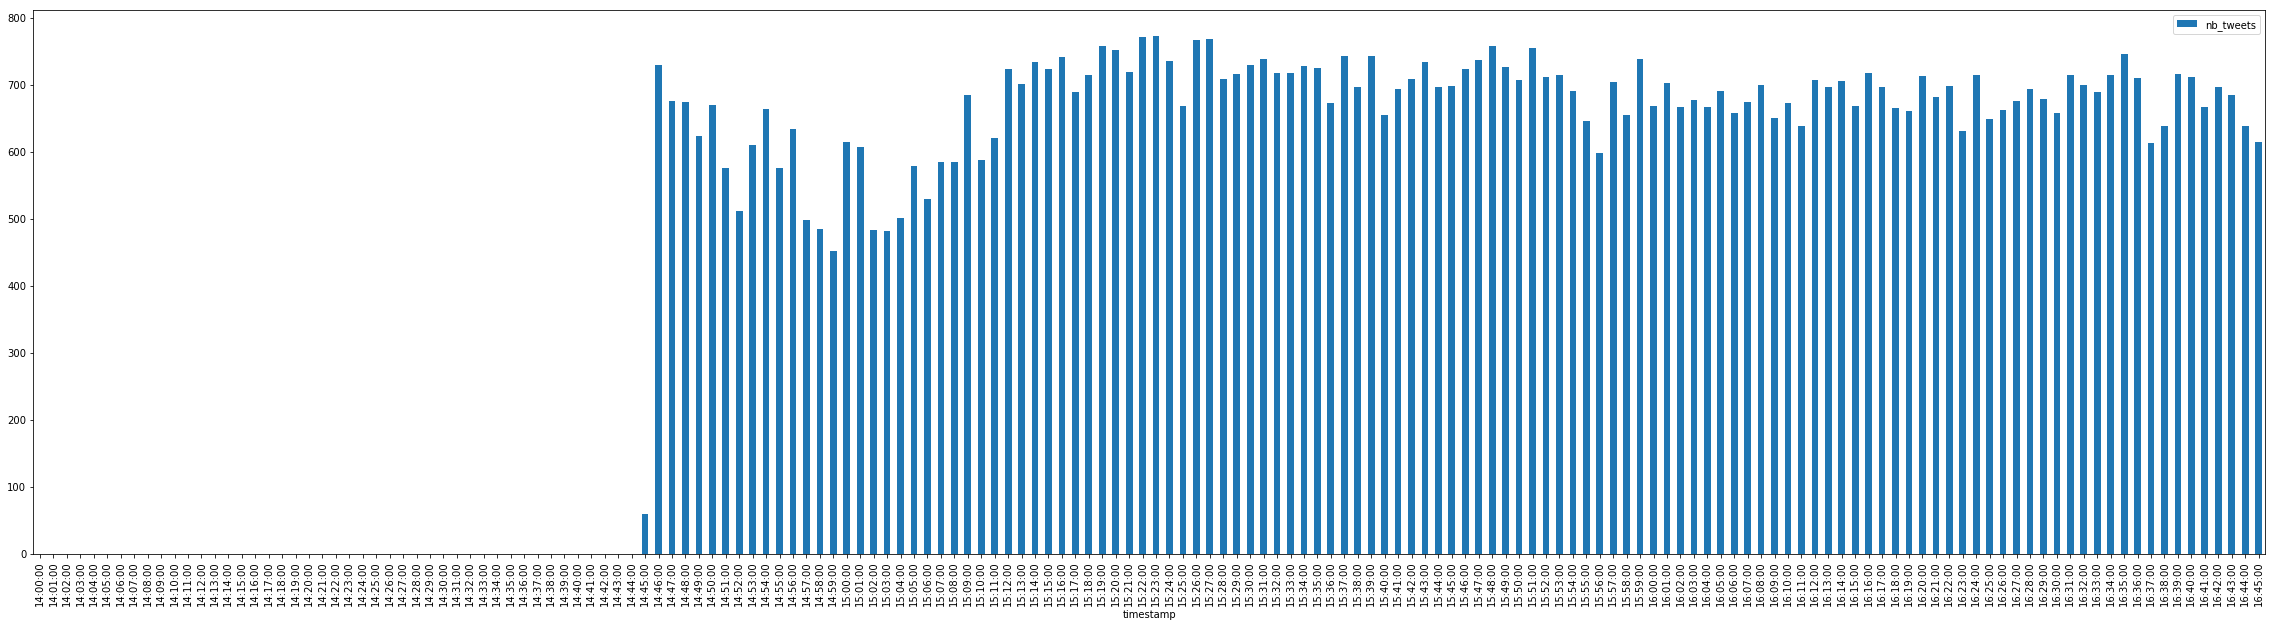

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

df_tweetsByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

In [10]:
#CONSULTA BÁSICA A ELASTICSEARCH PARA PROBAR
res = es.search(index="tp5-championstweet", body={"query": {"term":{"text":"goal"}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print("TWEET:%(text)s %(username)s: %(date)s" % hit["_source"])


Got 3749 Hits:
TWEET:#UCLfinal

Never felt this alive. Goal goal goal Gagan: Sat May 26 20:01:30 +0000 2018
TWEET:Yeyyyy😃😃 goal ,goal😃😃😃
#UCLfinal A girl with a brain without mind.: Sat May 26 20:25:25 +0000 2018
TWEET:Benzema goal was like Beginners Goal in Fifa,
Mane goal was like Superstar Goal in Fifa 😍😍
#UCLFinal
#ChampionsLeague B-Nayak: Sat May 26 20:05:29 +0000 2018
TWEET:Goal na Goal Bros https://t.co/MKK2cL6pdL Melanin Boy: Sat May 26 20:05:20 +0000 2018
TWEET:One crazy goal, one fantastic goal... 😁❤️ #UCLFinal #RealMadrid Nteni: Sat May 26 20:12:55 +0000 2018
TWEET:One crazy goal, one fantastic goal... 😁❤️ #UCLFinal #RealMadrid Nteni: Sat May 26 20:12:55 +0000 2018
TWEET:WHAT A GOAL BALE! WHAT A GOAL! 🔥🔥🔥🔥 💯  #UCLfinal Alma Aleel: Sat May 26 20:11:18 +0000 2018
TWEET:#UCLfinal goal........... Rehan syed: Sat May 26 20:00:03 +0000 2018
TWEET:RT @goal: WHAT. A. GOAL. 🔥🔥🔥
#UCLFinal https://t.co/ii4CMMRIEO 👑UNDERGROUND PAPI👑: Sat May 26 20:27:20 +0000 2018
TWEET:Madrid.....one c

1) ¿Cuántos tweets tienen la palabra "liverpool"? ¿Cómo se distribuye los tweets en el tiempo (ver en un histograma)

In [108]:
res = es.search(index="tp5-championstweet", body={"query": {"term":{"text":"liverpool"}},"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})

df_tweetsByMinutes_liverpool=pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
total_tweets=df_tweetsByMinutes_liverpool['doc_count'].sum()
total_tweets
#df
#for data in res['aggregations']['tweets_over_time']['buckets']:
 #  print(data['doc_count'])

177790

Tiene 177790 tweets la palabra "liverpool"

In [109]:
df_tweetsByMinutes_liverpool = df_tweetsByMinutes_liverpool.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
df_filter_liverpool = df_tweetsByMinutes_liverpool.drop(df_tweetsByMinutes[df_tweetsByMinutes.timestamp < 1527357600000 ].index)


In [99]:
import datetime

def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y



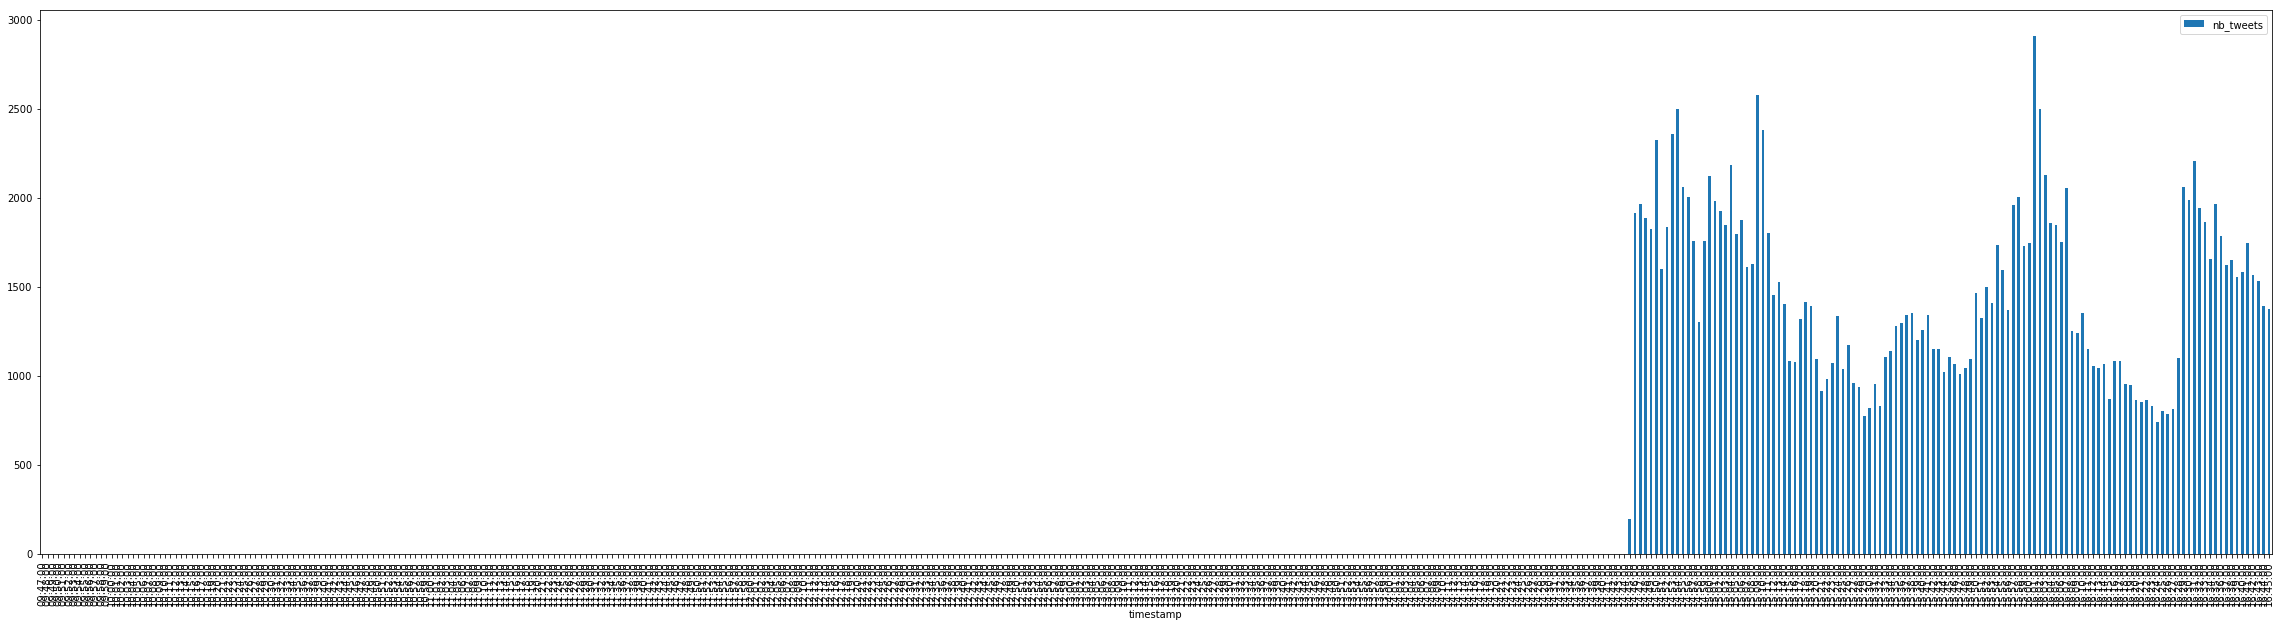

In [110]:
import matplotlib.pyplot as plt
df_filter_liverpool['timestamp']=df_tweetsByMinutes_liverpool['timestamp'].apply(timestamp2date)
%matplotlib inline
df_filter_liverpool.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()
#print(len(df_filter_liverpool))

2) ¿De dónde vienen los tweets? (utilizar el campo 'location')

In [101]:
res = es.search(index="tp5-championstweet", body={"query":{"match_all":{}},"size":10000,"aggs":{"country":\
{"terms":{"field":"location.keyword"}}}})

df=pd.DataFrame(res["aggregations"]['country']["buckets"])
df

,doc_count,key
0,14149,"Lagos, Nigeria"
1,10213,Nigeria
2,7759,"London, England"
3,6939,"Nairobi, Kenya"
4,6624,South Africa
5,5823,"Johannesburg, South Africa"
6,4843,London
7,4172,United Kingdom
8,4045,Brasil
9,3896,"Rio de Janeiro, Brasil"


3) ¿Cuántos tweets tienen las palabras "liverpool" y "goal"? (ver en un histograma)

In [112]:
res = es.search(index="tp5-championstweet", body={"query": {"term":{"text":"goal"}},"aggs" : { "tweets_over_time" : \
                                                            { "date_histogram" : { "field" : \
                                                                                  "timestamp", "interval" : "1m" \
                                                                                 }}}})
df_tweetsByMinutes=pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_tweetsByMinutes = df_tweetsByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
df_filter_goal = df_tweetsByMinutes.drop(df_tweetsByMinutes[df_tweetsByMinutes.timestamp < 1527357600000 ].index)
import datetime

print(df_tweetsByMinutes)
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y


df_filter_goal['timestamp']=df_tweetsByMinutes['timestamp'].apply(timestamp2date)



     nb_tweets      timestamp
0            2  1527340680000
1            0  1527340740000
2            0  1527340800000
3            0  1527340860000
4            0  1527340920000
5            0  1527340980000
6            0  1527341040000
7            0  1527341100000
8            0  1527341160000
9            0  1527341220000
10           0  1527341280000
11           0  1527341340000
12           0  1527341400000
13           0  1527341460000
14           0  1527341520000
15           0  1527341580000
16           0  1527341640000
17           0  1527341700000
18           0  1527341760000
19           0  1527341820000
20           0  1527341880000
21           0  1527341940000
22           0  1527342000000
23           2  1527342060000
24           0  1527342120000
25           0  1527342180000
26           0  1527342240000
27           0  1527342300000
28           0  1527342360000
29           0  1527342420000
..         ...            ...
418       2280  1527365760000
419       

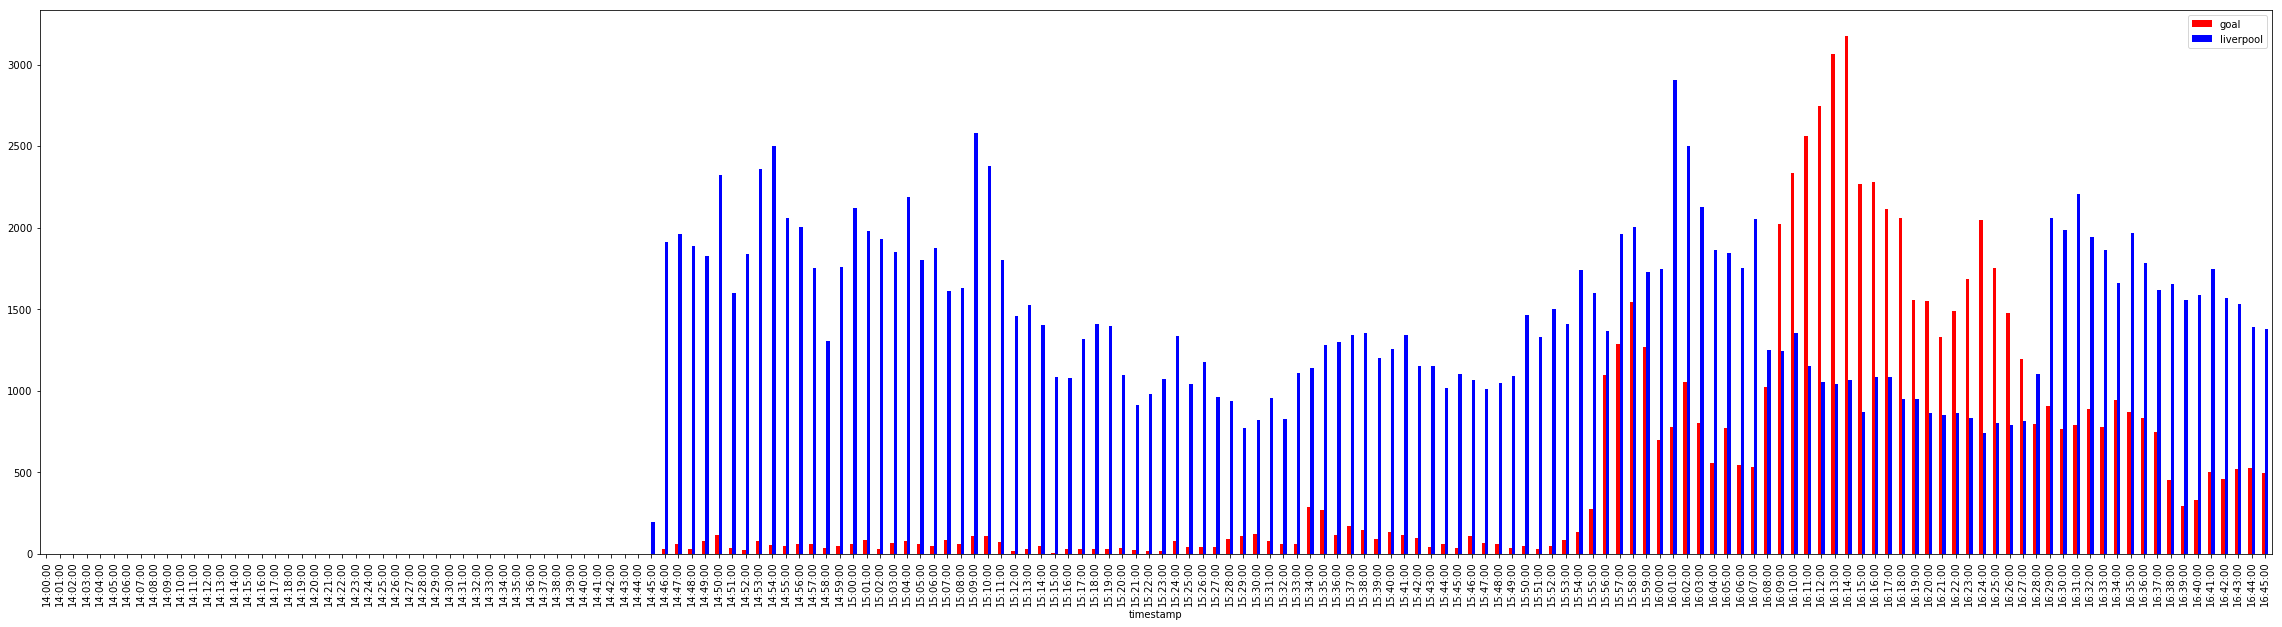

In [116]:
import numpy as np
import matplotlib.pyplot as plt

test=df_filter_goal
test["liverpool"]=df_filter_liverpool['nb_tweets']
test = test.rename(columns={'key': 'timestamp', 'nb_tweets': 'goal'})
%matplotlib inline
test.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp',y=["goal","liverpool"],color=["red","blue"])
plt.show()

4) Graficar un Pie Chart comparando el número de tweets con: a) la palabra 'liverpool', b) la palabra 'madrid', c) la palabra 'madrid' y 'liverpool' d) ninguna de las palabras

A)


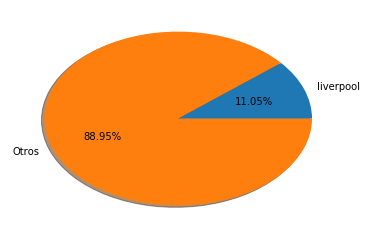

B)


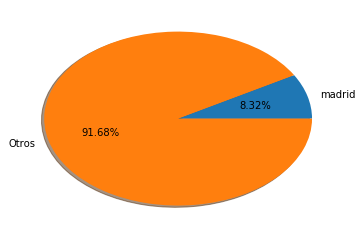

C)


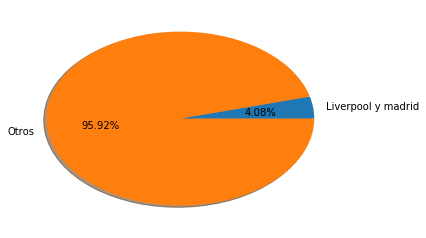

D)


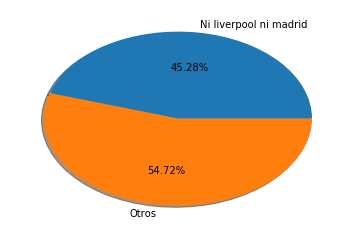

In [225]:
import matplotlib

total_tweets = es.count(index="tp5-championstweet", body={"query": {"match_all": {}}})["count"]

liverpool_tweets = es.count(index="tp5-championstweet", body={"query": {"match": {"text":"liverpool"}}})["count"]

madrid_tweets = es.count(index="tp5-championstweet", body={"query": {"match": {"text":"madrid"}}})["count"]

madrid_and_liverpool_tweets = es.count(index="tp5-championstweet", body={"query":\
                { "bool":{"must":[{"match":{"text":"liverpool"}},{"match":{"text":"madrid"}}]}}})["count"]

madrid_or_liverpool_tweets=es.count(index="tp5-championstweet", body={"query": {"match": {"text":"liverpool madrid"}}})["count"]

madrid_or_liverpool_tweets = total_tweets - madrid_or_liverpool_tweets

data_a=[liverpool_tweets,total_tweets]
data_b=[madrid_tweets,total_tweets]
data_c=[madrid_and_liverpool_tweets,total_tweets]
data_d=[madrid_or_liverpool_tweets,total_tweets]


matplotlib.pyplot.pie(x=data_a,labels=["liverpool","Otros"],shadow=True,autopct='%.2f%%')
print("A)")
plt.show()

matplotlib.pyplot.pie(x=data_b,labels=["madrid","Otros"],shadow=True,autopct='%.2f%%')
print("B)")
plt.show()

matplotlib.pyplot.pie(x=data_c,labels=["Liverpool y madrid","Otros"],shadow=True,autopct='%.2f%%')
print("C)")
plt.show()


matplotlib.pyplot.pie(x=data_d,labels=["Ni liverpool ni madrid","Otros"],shadow=True,autopct='%.2f%%')
print("D)")
plt.show()



5)¿Cuáles son los emoticons más frecuentes? A partir de las visualizaciones disponibles en las librerias MatplotLib y/o Seaborn (seaborn.pydata.org), proponer una visualización para observar las emociones expresadas durante el partido